In [1]:
# -------------------------------------------------------
# Netflix Content Trends Analysis
# -------------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
# -------------------------------------------------------
# Load the Dataset
# -------------------------------------------------------

# Replace with your dataset filename if different
df = pd.read_csv("/content/Netflix_Dataset.csv")

# Quick look at the dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# Preview first few rows
df.head()

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# -------------------------------------------------------
# Data Cleaning
# -------------------------------------------------------

# Convert Release_Date to datetime and extract Year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df['Type'] = df['Type'].fillna("Unknown")

# Extract Main Genre (first genre if multiple are present)
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

# Display cleaned info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      7789 non-null   object        
 4   Cast          7789 non-null   object        
 5   Country       7789 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7789 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
 11  Year          7691 non-null   float64       
 12  Main_Genre    7789 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 791.2+ KB


In [5]:
# -------------------------------------------------------
# Exploratory Data Analysis
# -------------------------------------------------------

print("Dataset covers years from", df['Year'].min(), "to", df['Year'].max())
print("\nCategory Distribution:\n", df['Category'].value_counts())
print("\nTop 5 Countries:\n", df['Country'].value_counts().head())
print("\nTop 10 Genres:\n", df['Main_Genre'].value_counts().head(10))

Dataset covers years from 2008.0 to 2021.0

Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Top 10 Genres:
 Main_Genre
Dramas                      1385
Comedies                    1075
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
Name: count, dtype: int64


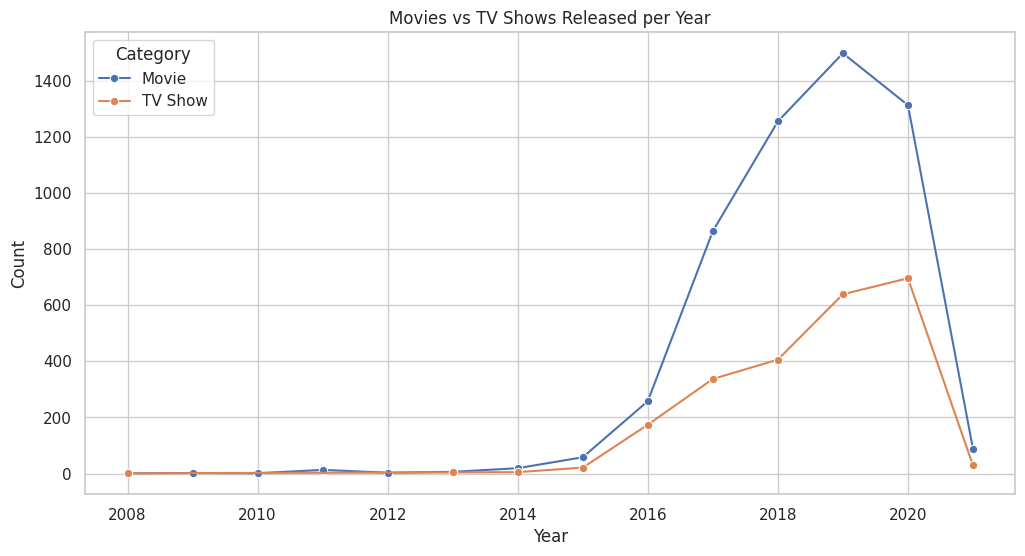

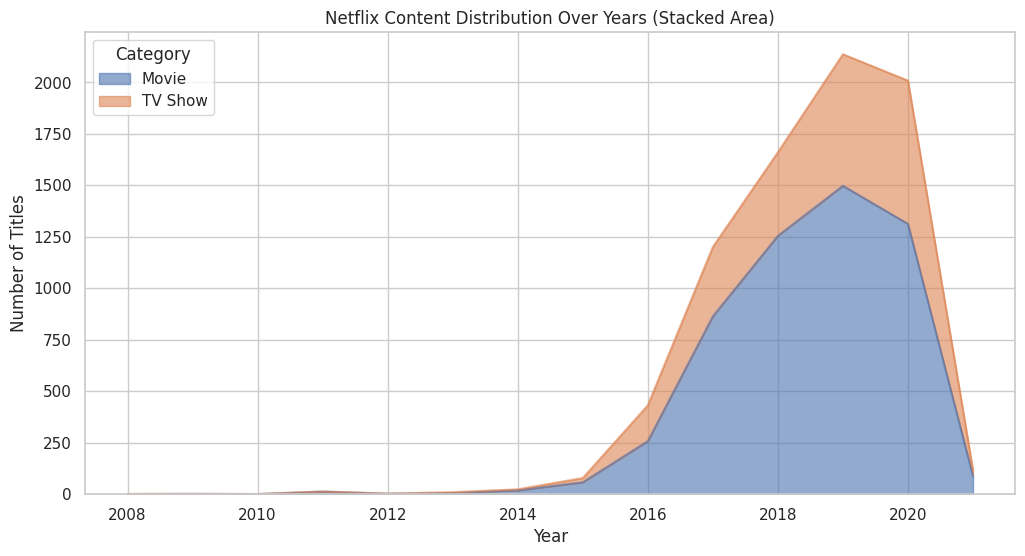

In [6]:
# -------------------------------------------------------
# Movies vs TV Shows Over the Years
# -------------------------------------------------------

content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Optional: Stacked Area for smoother trend view
pivot_trend = content_trend.pivot(index='Year', columns='Category', values='Count').fillna(0)
pivot_trend.plot(kind='area', stacked=True, alpha=0.6)
plt.title("Netflix Content Distribution Over Years (Stacked Area)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


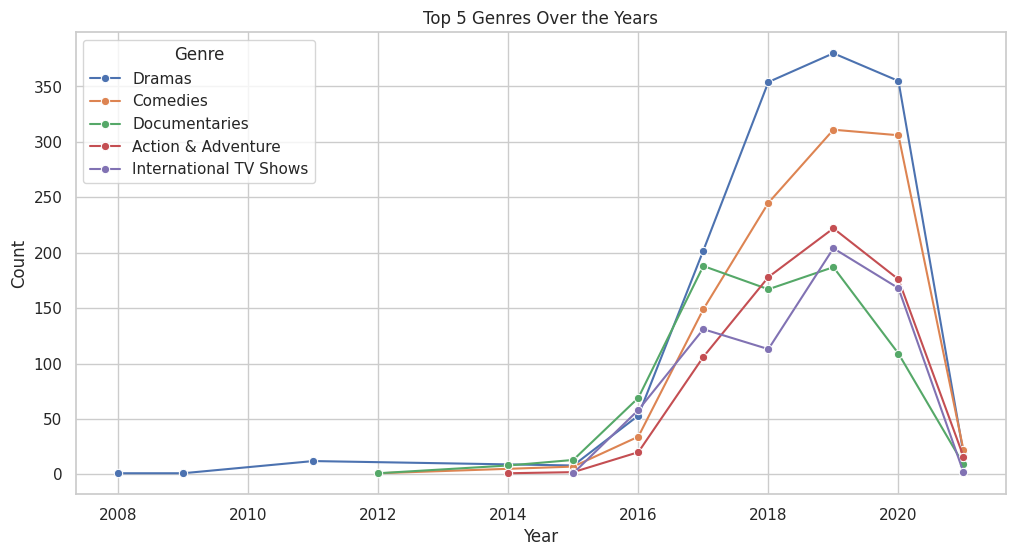

In [7]:
# -------------------------------------------------------
# Genre Trends Over Time
# -------------------------------------------------------

genre_trend = df.groupby(['Year', 'Main_Genre']).size().reset_index(name='Count')
top_genre_names = df['Main_Genre'].value_counts().head(5).index
genre_trend = genre_trend[genre_trend['Main_Genre'].isin(top_genre_names)]

sns.lineplot(data=genre_trend, x='Year', y='Count', hue='Main_Genre', marker='o')
plt.title("Top 5 Genres Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()


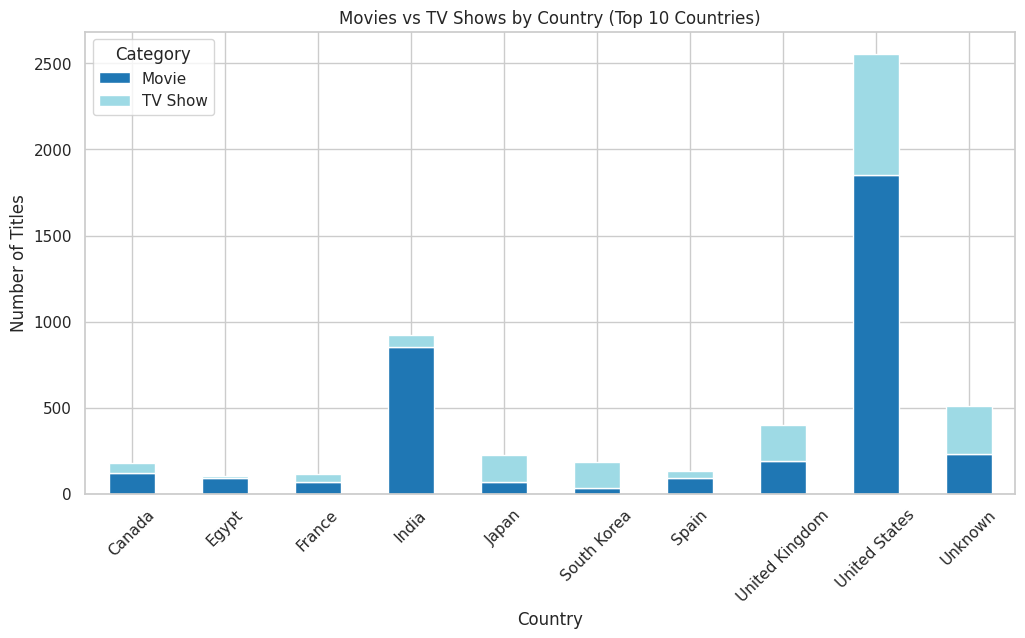

In [9]:
# -------------------------------------------------------
# Country-wise Contribution
# -------------------------------------------------------

top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked_country = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

stacked_country.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Optional: Interactive choropleth map
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    title='Global Distribution of Netflix Titles',
    color=df['Country'].map(df['Country'].value_counts()),
    color_continuous_scale='Reds'
)
fig.show()


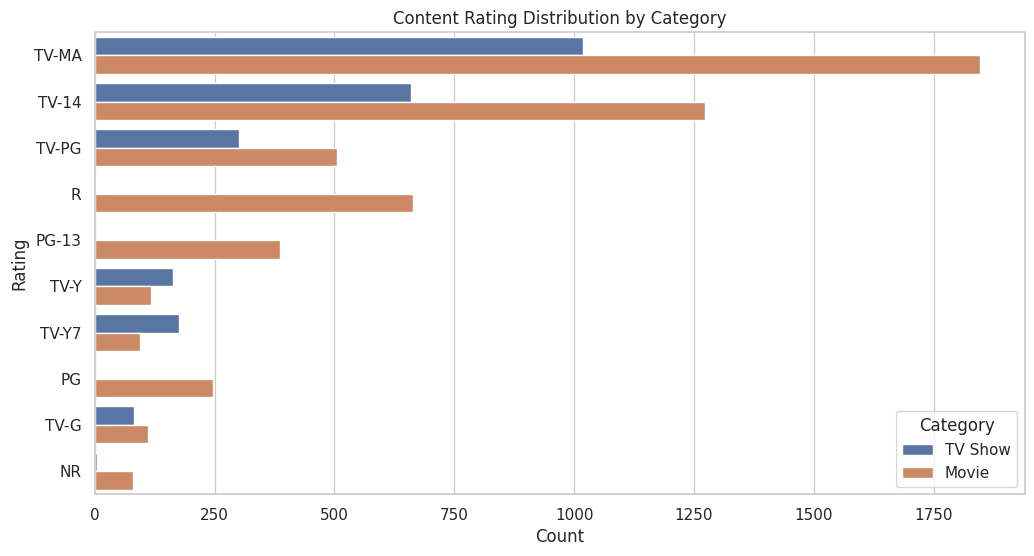

In [10]:
# -------------------------------------------------------
# Rating Distribution by Category
# -------------------------------------------------------

rating_order = df['Rating'].value_counts().index[:10]
sns.countplot(data=df[df['Rating'].isin(rating_order)], y='Rating', hue='Category', order=rating_order)
plt.title("Content Rating Distribution by Category")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

<>:6: SyntaxWarning:

invalid escape sequence '\d'

<>:6: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-2931971979.py:6: SyntaxWarning:

invalid escape sequence '\d'



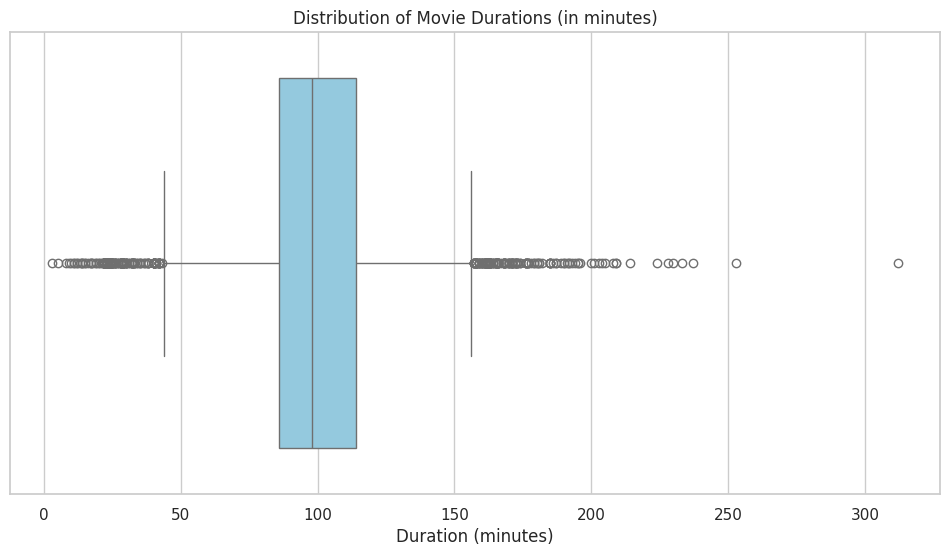

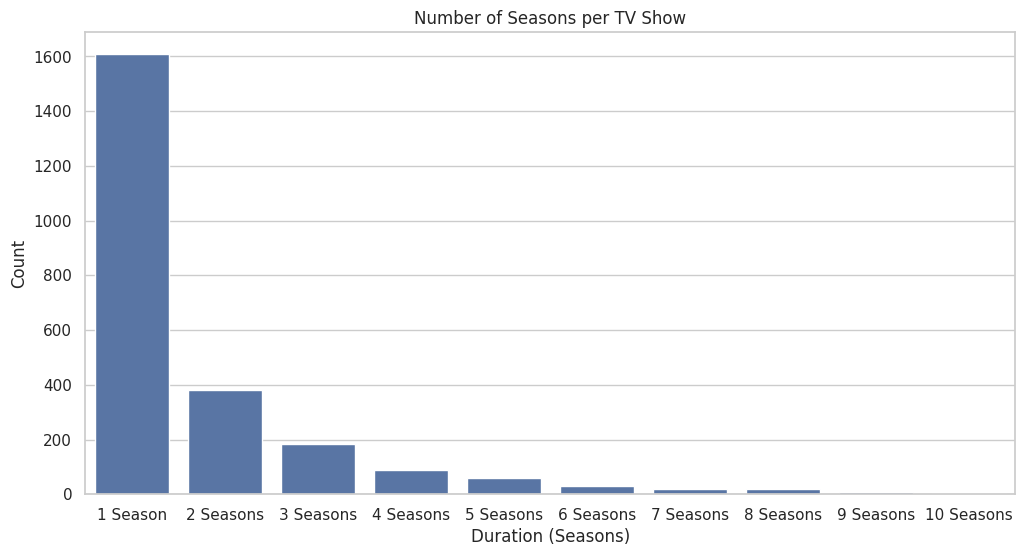

In [11]:
# -------------------------------------------------------
# Duration Analysis (Movies vs TV Shows)
# -------------------------------------------------------

# Separate duration numbers
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)

sns.boxplot(data=df[df['Category'] == 'Movie'], x='Duration_Numeric', color='skyblue')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.show()

sns.countplot(data=df[df['Category'] == 'TV Show'], x='Duration', order=df[df['Category'] == 'TV Show']['Duration'].value_counts().index[:10])
plt.title("Number of Seasons per TV Show")
plt.xlabel("Duration (Seasons)")
plt.ylabel("Count")
plt.show()


In [12]:
# -------------------------------------------------------
# Wrap-up Summary (Quick Insights)
# -------------------------------------------------------

print("✅ Basic Objectives Covered:")
print("1. Movies vs TV Shows trend over the years ✔️")
print("2. Top genres identified and visualized ✔️")
print("3. Country-wise contribution analyzed ✔️")
print("4. Basic genre trends and rating insights added ✔️")
print("5. Duration distribution visualized ✔️")

print("\nThis completes the basic version of Netflix Content Trends Analysis.")


✅ Basic Objectives Covered:
1. Movies vs TV Shows trend over the years ✔️
2. Top genres identified and visualized ✔️
3. Country-wise contribution analyzed ✔️
4. Basic genre trends and rating insights added ✔️
5. Duration distribution visualized ✔️

This completes the basic version of Netflix Content Trends Analysis.
